KeyError: 'Blue Cumulative Reward'

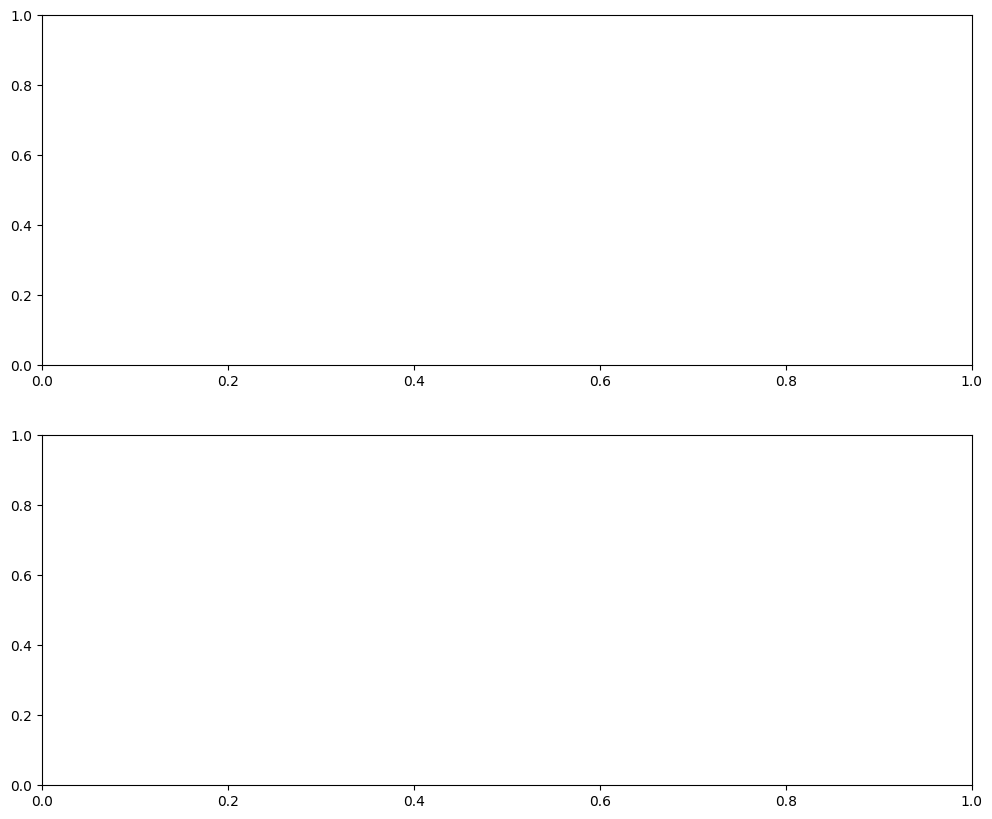

In [9]:
# Enable inline plotting for Jupyter Lab
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Parameter for grouping type ('Buffer-size' or 'Batch-size')
grouping_type = 'Buffer-size'  # Change to 'Batch-size' as needed
# Parameter for metric type ('Main Thread Time', 'Physics Time', or 'Memory Usage')
metric_type = 'Blue Cumulative Reward'  # Change as needed

# Define the metric column name based on metric_type
metric_columns = {
    'Main Thread Time': 'Main Thread Time (ms)',
    'Physics Time': 'Physics Time (ms)',
    'Memory Usage': 'Memory Usage (MB)'
}

# Define file paths for each group based on grouping_type
if grouping_type == 'Buffer-size':
    file_paths_1 = glob.glob('/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/Buffer-size_10k-*.csv')
    file_paths_2 = glob.glob('/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/Buffer-size_400k-*.csv')
    label_1 = 'Buffer-size 10k'
    label_2 = 'Buffer-size 400k'
elif grouping_type == 'Batch-size':
    file_paths_1 = glob.glob('/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/Batch-size_512-*.csv')
    file_paths_2 = glob.glob('/Users/mac/Documents/UM/UM-Old/Year_2/PROJECT2_1/AIML-UM-14/AIML/Project/stats/Batch-size_5120-*.csv')
    label_1 = 'Batch-size 512'
    label_2 = 'Batch-size 5120'

def process_data(file_paths):
    dfs = [pd.read_csv(fp) for fp in file_paths]
    # Determine the minimum length among all runs
    min_length = min(len(df) for df in dfs)
    # Trim all DataFrames to the minimum length
    trimmed_dfs = [df.iloc[:min_length].reset_index(drop=True) for df in dfs]
    # Calculate the average using groupby with level=0
    avg_df = pd.concat(trimmed_dfs).groupby(level=0).mean().reset_index(drop=True)
    # Convert Wall Time from ms to seconds
    avg_df['Wall Time (s)'] = avg_df['Wall Time (ms)'] / 1000
    # Create a new column for 30-second intervals
    avg_df['Interval_30s'] = (avg_df['Wall Time (s)'] // 30) * 30
    # Group by the 30-second intervals and calculate the mean
    cleaned_avg_df = avg_df.groupby('Interval_30s').mean().reset_index()
    return cleaned_avg_df

# Process data for each group
cleaned_avg_df_1 = process_data(file_paths_1)
cleaned_avg_df_2 = process_data(file_paths_2)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for first buffer size
sns.lineplot(ax=ax1, x='Wall Time (s)', y=metric_columns[metric_type], data=cleaned_avg_df_1, label=label_1, color='blue')
ax1.set_title(f'{metric_type} Over Time - {label_1}')
ax1.set_xlabel('Wall Time (s)')
ax1.set_ylabel(f'{metric_type} ({metric_columns[metric_type].split("(")[-1].strip(")")})')
ax1.legend()

# Plot for second buffer size
sns.lineplot(ax=ax2, x='Wall Time (s)', y=metric_columns[metric_type], data=cleaned_avg_df_2, label=label_2, color='orange')
ax2.set_title(f'{metric_type} Over Time - {label_2}')
ax2.set_xlabel('Wall Time (s)')
ax2.set_ylabel(f'{metric_type} ({metric_columns[metric_type].split("(")[-1].strip(")")})')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(f'{metric_type.lower().replace(" ", "_")}_{grouping_type}_split.png')
plt.show()